In [1]:
# Some sample questions:

# Q1. The sensor will overestimate the PM concentration in humid conditions (relative humidty RH > ~75%) and will
# understimate the PM concentrations in dry conditions (RH < ~50%) -> characterise dependency and come up with
# a correction method.

# Q2. How to deal with intrinsic sensor to sensor variability?

# Q3. Are there areas in Leuven that show a systematic higher pollution than others? Can this be linked to traffic,
# to agricultural activities?

# Q4. Identify areas with high concentration of wood stoves (peaks in winter during evening/night)?

# Q5. Is there any indication that there is more PM in areas with heavy traffic?

# Q6. Develop a valuable method for real-time interpolation (+ how to handle instantaneous peaks)?

# Q7. (Check LeuvenairGenPresnt.pptx)
# Best,
# I sometimes don't know how to interpret the graphs?
# Sometimes I see peaks at midnight and around 3 am. Red?
# Now the cars have been moving for a few hours: ie acceleration, stopping, acceleration and ... the measurement says: green
# Please provide some explanation if possible.

In [2]:
# imports
import pandas as pd
import numpy as np
from myutils.utility import readJson, getSensorData 
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Get all the variable names
varname = list(pd.read_csv('LEUVENAIRfulldump2018.csv', skiprows=0, nrows = 0, usecols = None).columns)
print('All variable names are :', varname)

All variable names are : ['DATEUTC', 'LAT', 'LON', 'SDS011ID', 'PM2.5', 'PM10', 'DHTID', 'TEMPERATURE', 'HUMIDITY', 'OBSID']


In [4]:
dframe = pd.read_csv('LEUVENAIRfulldump2018.csv', skiprows=0, nrows = None, usecols = ['DATEUTC','SDS011ID','PM2.5','PM10'])
val = dframe.values

In [5]:
timeUTC = val[:,0]; SDS011ID = val[:,1]; PM25 = val[:,2]; PM10 = val[:,3]

In [6]:
flag = ((timeUTC>'2018-04-01 00:00:00') & (timeUTC<'2018-05-01 00:00:00'))
timeUTC_April = timeUTC[flag]; SDS011ID_April = SDS011ID[flag]; PM25_April = PM25[flag]; PM10_April = PM10[flag]
print('Reading 1 months data should result in a factor of 12 but since Jan is not included in the measurements')
print('for the year 2018, we have a factor of ',timeUTC.shape[0]/timeUTC_April.shape[0], 'which is close to 11 as expected.')

Reading 1 months data should result in a factor of 12 but since Jan is not included in the measurements
for the year 2018, we have a factor of  10.499084198550895 which is close to 11 as expected.


In [7]:
timeUTC_April = pd.to_datetime(np.squeeze(timeUTC_April))
seconds = timeUTC_April.second
minutes = timeUTC_April.minute
hours = timeUTC_April.hour
days = timeUTC_April.day
weeks = timeUTC_April.week

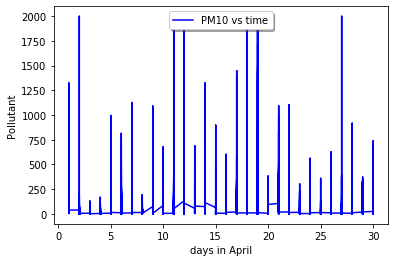

In [8]:
#plt.plot(np.squeeze(days),np.squeeze(PM25_April), 'r', label = 'PM25 vs time')
plt.plot(np.squeeze(days),np.squeeze(PM10_April), 'b', label = 'PM10 vs time')
plt.xlabel('days in April')
plt.ylabel('Pollutant')
legend = plt.legend(loc='upper center', shadow=True)